In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def cluster_and_visualise(datafilename, K, featurenames, n_init=100, cmap='viridis'):
    data = np.genfromtxt(datafilename, delimiter=',')
    
    if K > len(featurenames):
        raise ValueError("Number of clusters (K) must be less than or equal to the number of features.")

    kmeans = KMeans(n_clusters=K, n_init=n_init)
    cluster_labels = kmeans.fit_predict(data)
    cluster_centers = kmeans.cluster_centers_

    num_features = len(featurenames)
    fig, axs = plt.subplots(num_features, num_features, figsize=(12, 12))

    # Calculate histograms for each feature in data
    histograms = [np.histogram(data[:, i], bins='auto') for i in range(num_features)]
    
    # Define different colors for the two sets of bars in histograms
    colors = ['blue', 'orange']

    
    # Visualize histograms for each feature
    for i in range(num_features):
        for j in range(num_features):
            ax = axs[i, j]
            if i == j:
                # Plot histograms for clusters using different colors
                for cluster_num in range(K):
                    ax.hist(data[cluster_labels == cluster_num, i], bins=histograms[i][1], alpha=0.5,
                            color=colors[cluster_num % len(colors)], label=f'Cluster {cluster_num}')
                            # Add cluster centers as vertical lines on the histogram
                for center in cluster_centers:
                    ax.axvline(x=center[i], color='red', linestyle='--', linewidth=2)

    # Plot the cluster centers on each subplot
    for i in range(num_features):
        for j in range(num_features):
            for k in range(K):
                axs[i, j].scatter(data[cluster_labels == k, i], data[cluster_labels == k, j], label=f'Cluster {k+1}', cmap='viridis', alpha=0.5)
            axs[i, j].scatter(cluster_centers[:, i], cluster_centers[:, j], c='red', marker='x', s=100, label='Cluster Centers')
            axs[i, j].set_xlabel(featurenames[i])
            axs[i, j].set_ylabel(featurenames[j])

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    fig.suptitle(f'K-Means Clustering by {",".join(featurenames)} by ei2-rasheed', fontsize=15,)
    fig.text(0.6, 0.01, 'Made by ei2-rasheed', ha='right', va='bottom')
    plt.savefig('myVisualiserTest.jpg')
    plt.tight_layout()
    plt.show()

    

In [3]:
# Define the feature names
featurenames = ('mean_red', 'mean_green', 'mean_blue', 'width', 'height', 'weight')

# Specify the path to the data file
datafile = 'fruit_values.csv'

# Call the cluster_and_visualise function
cluster_and_visualise(datafile, 3, featurenames)

C:\Users\evaan\AppData\Local\Temp\ipykernel_15516\1305697837.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i, j].scatter(data[cluster_labels == k, i], data[cluster_labels == k, j], label=f'Cluster {k+1}', cmap='viridis', alpha=0.5)


KeyboardInterrupt: 

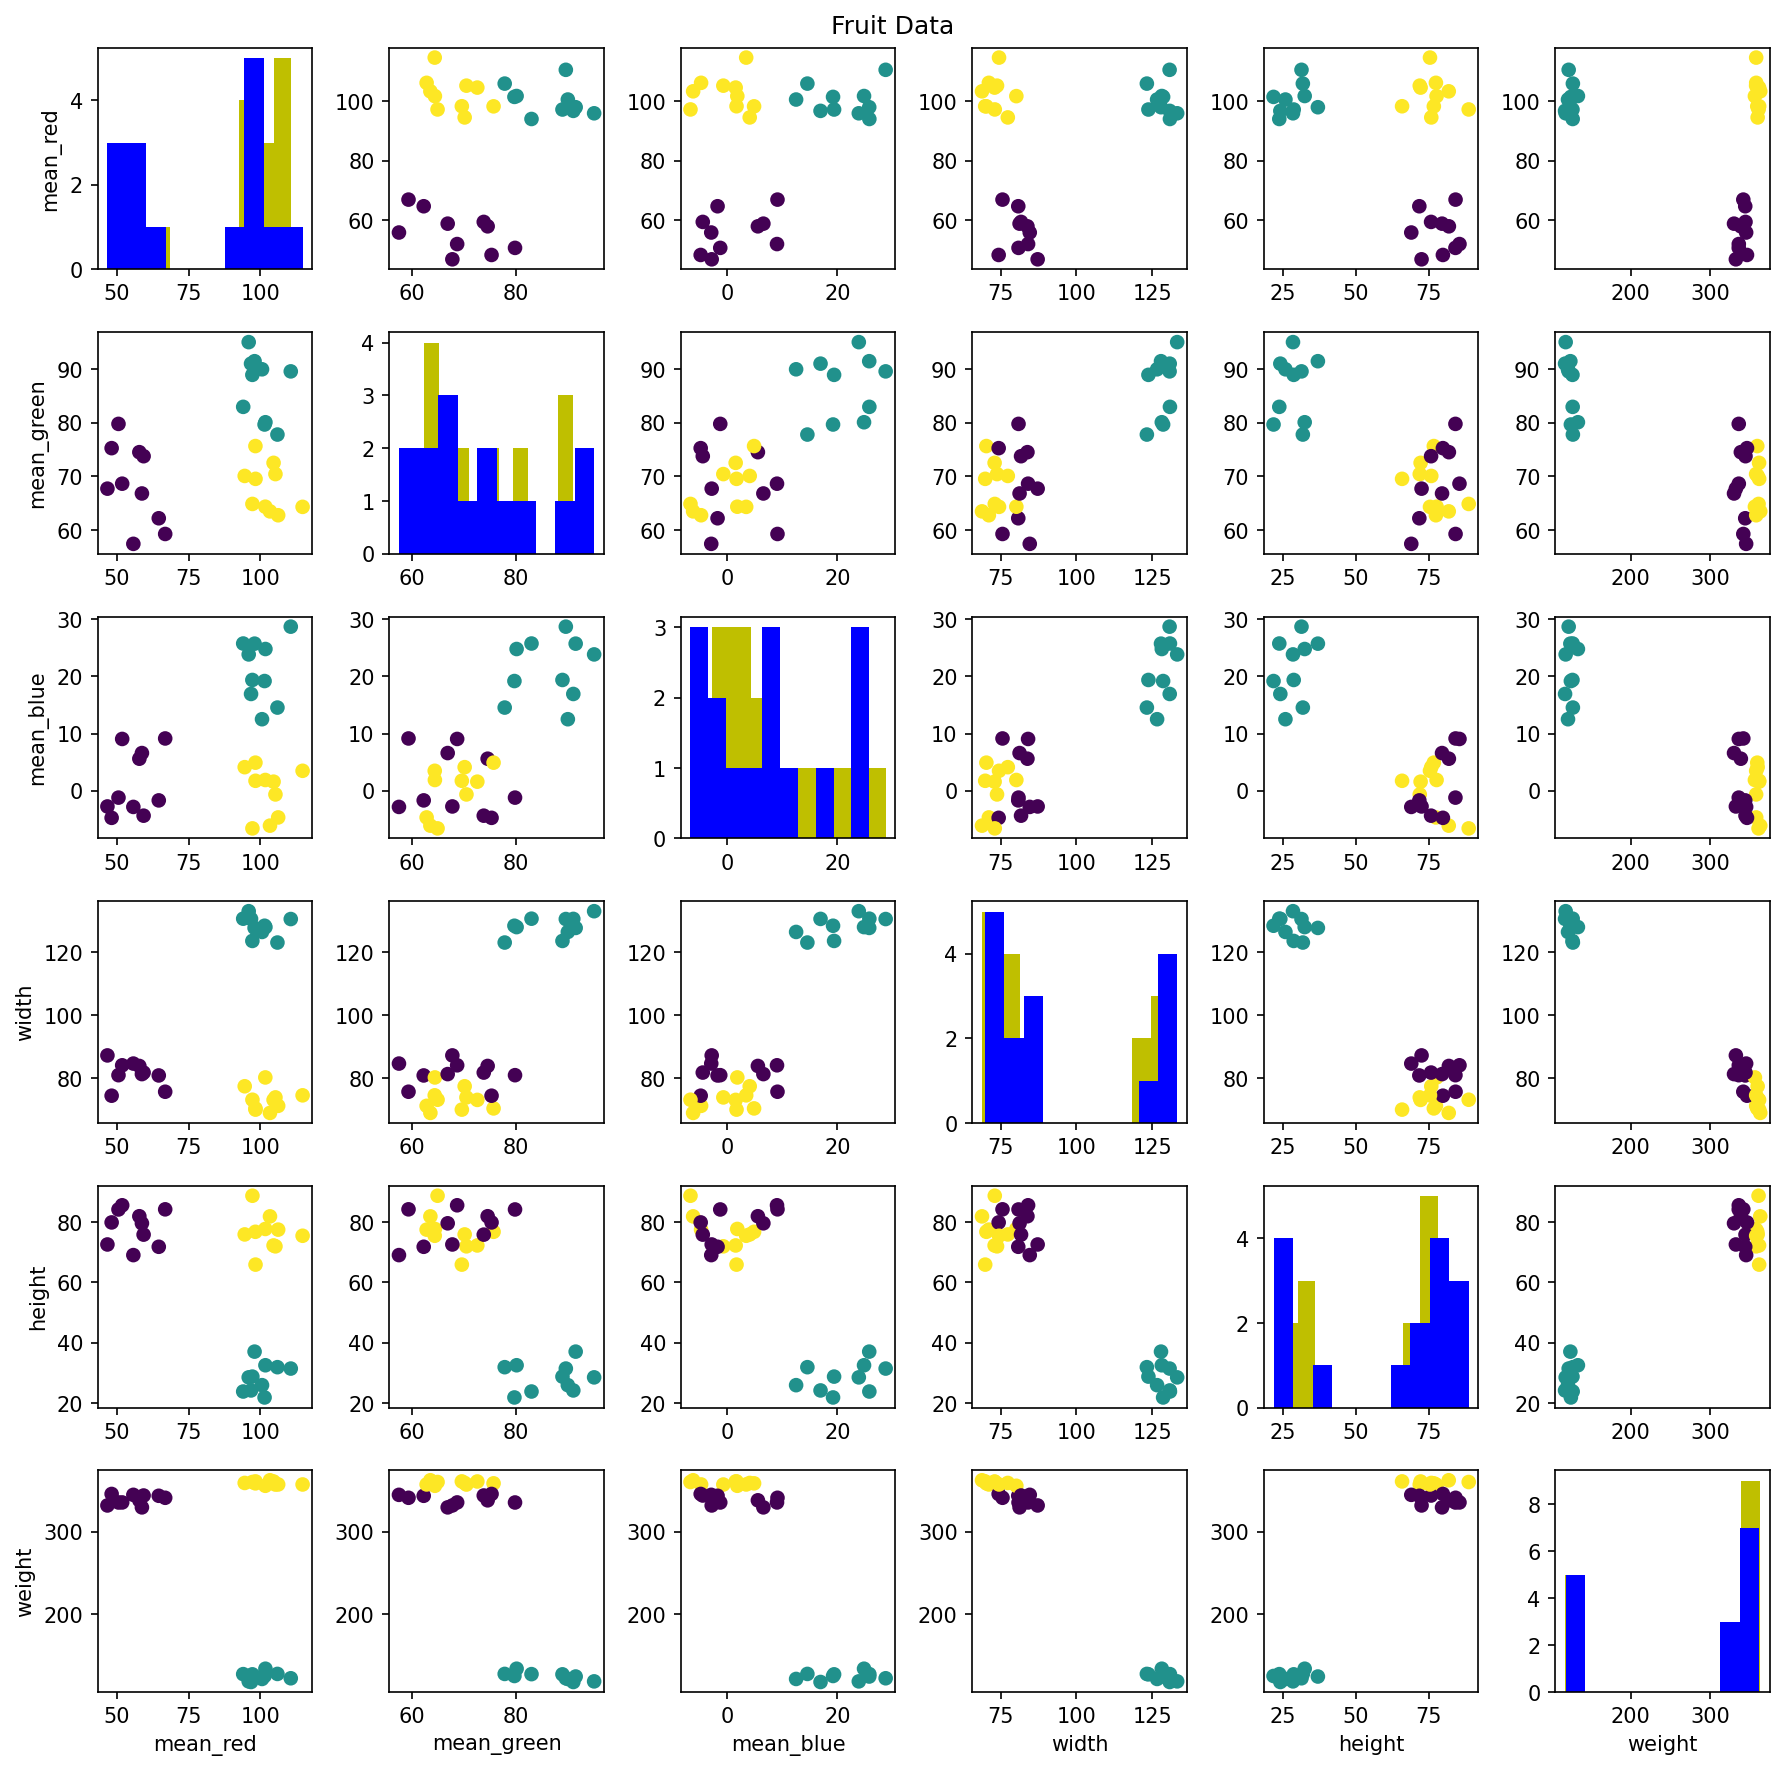

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def cluster_and_visualise(datafilename, K, featurenames):
    data = np.genfromtxt(datafilename, delimiter=",")
    tp_data = data.T

    fig, axs = plt.subplots(len(tp_data), len(tp_data))
    fig.set_size_inches(25, 25)

    kmeans = KMeans(n_clusters=K, n_init=10)
    K_value= kmeans.fit_predict(data)

    for X, x in enumerate(axs):
        for Y, graph in enumerate(x):
            if Y == 0 :
                graph.set_ylabel(featurenames[X])
            if X == (len(tp_data)-1):
                graph.set_xlabel(featurenames[Y])
            if X == Y :
                graph.hist(tp_data[X][:len(data)//2], color="y")
                graph.hist(tp_data[X][len(data)//2:], color="b")
            else:
                graph.scatter(tp_data[Y],tp_data[X],c=K_value)
                
    fig.suptitle("Fruit Data")
    fig.set_size_inches(12, 12)
    fig.set_dpi(150)
    fig.tight_layout()
    plt.savefig("myVisualisation.png")
    return fig, axs

if __name__ == "__main__":
    featurenames = ('mean_red', 'mean_green', 'mean_blue', 'width', 'height', 'weight')
    datafile = 'fruit_values.csv'
    cluster_and_visualise(datafile, 3, featurenames)
 

c:\Users\evaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


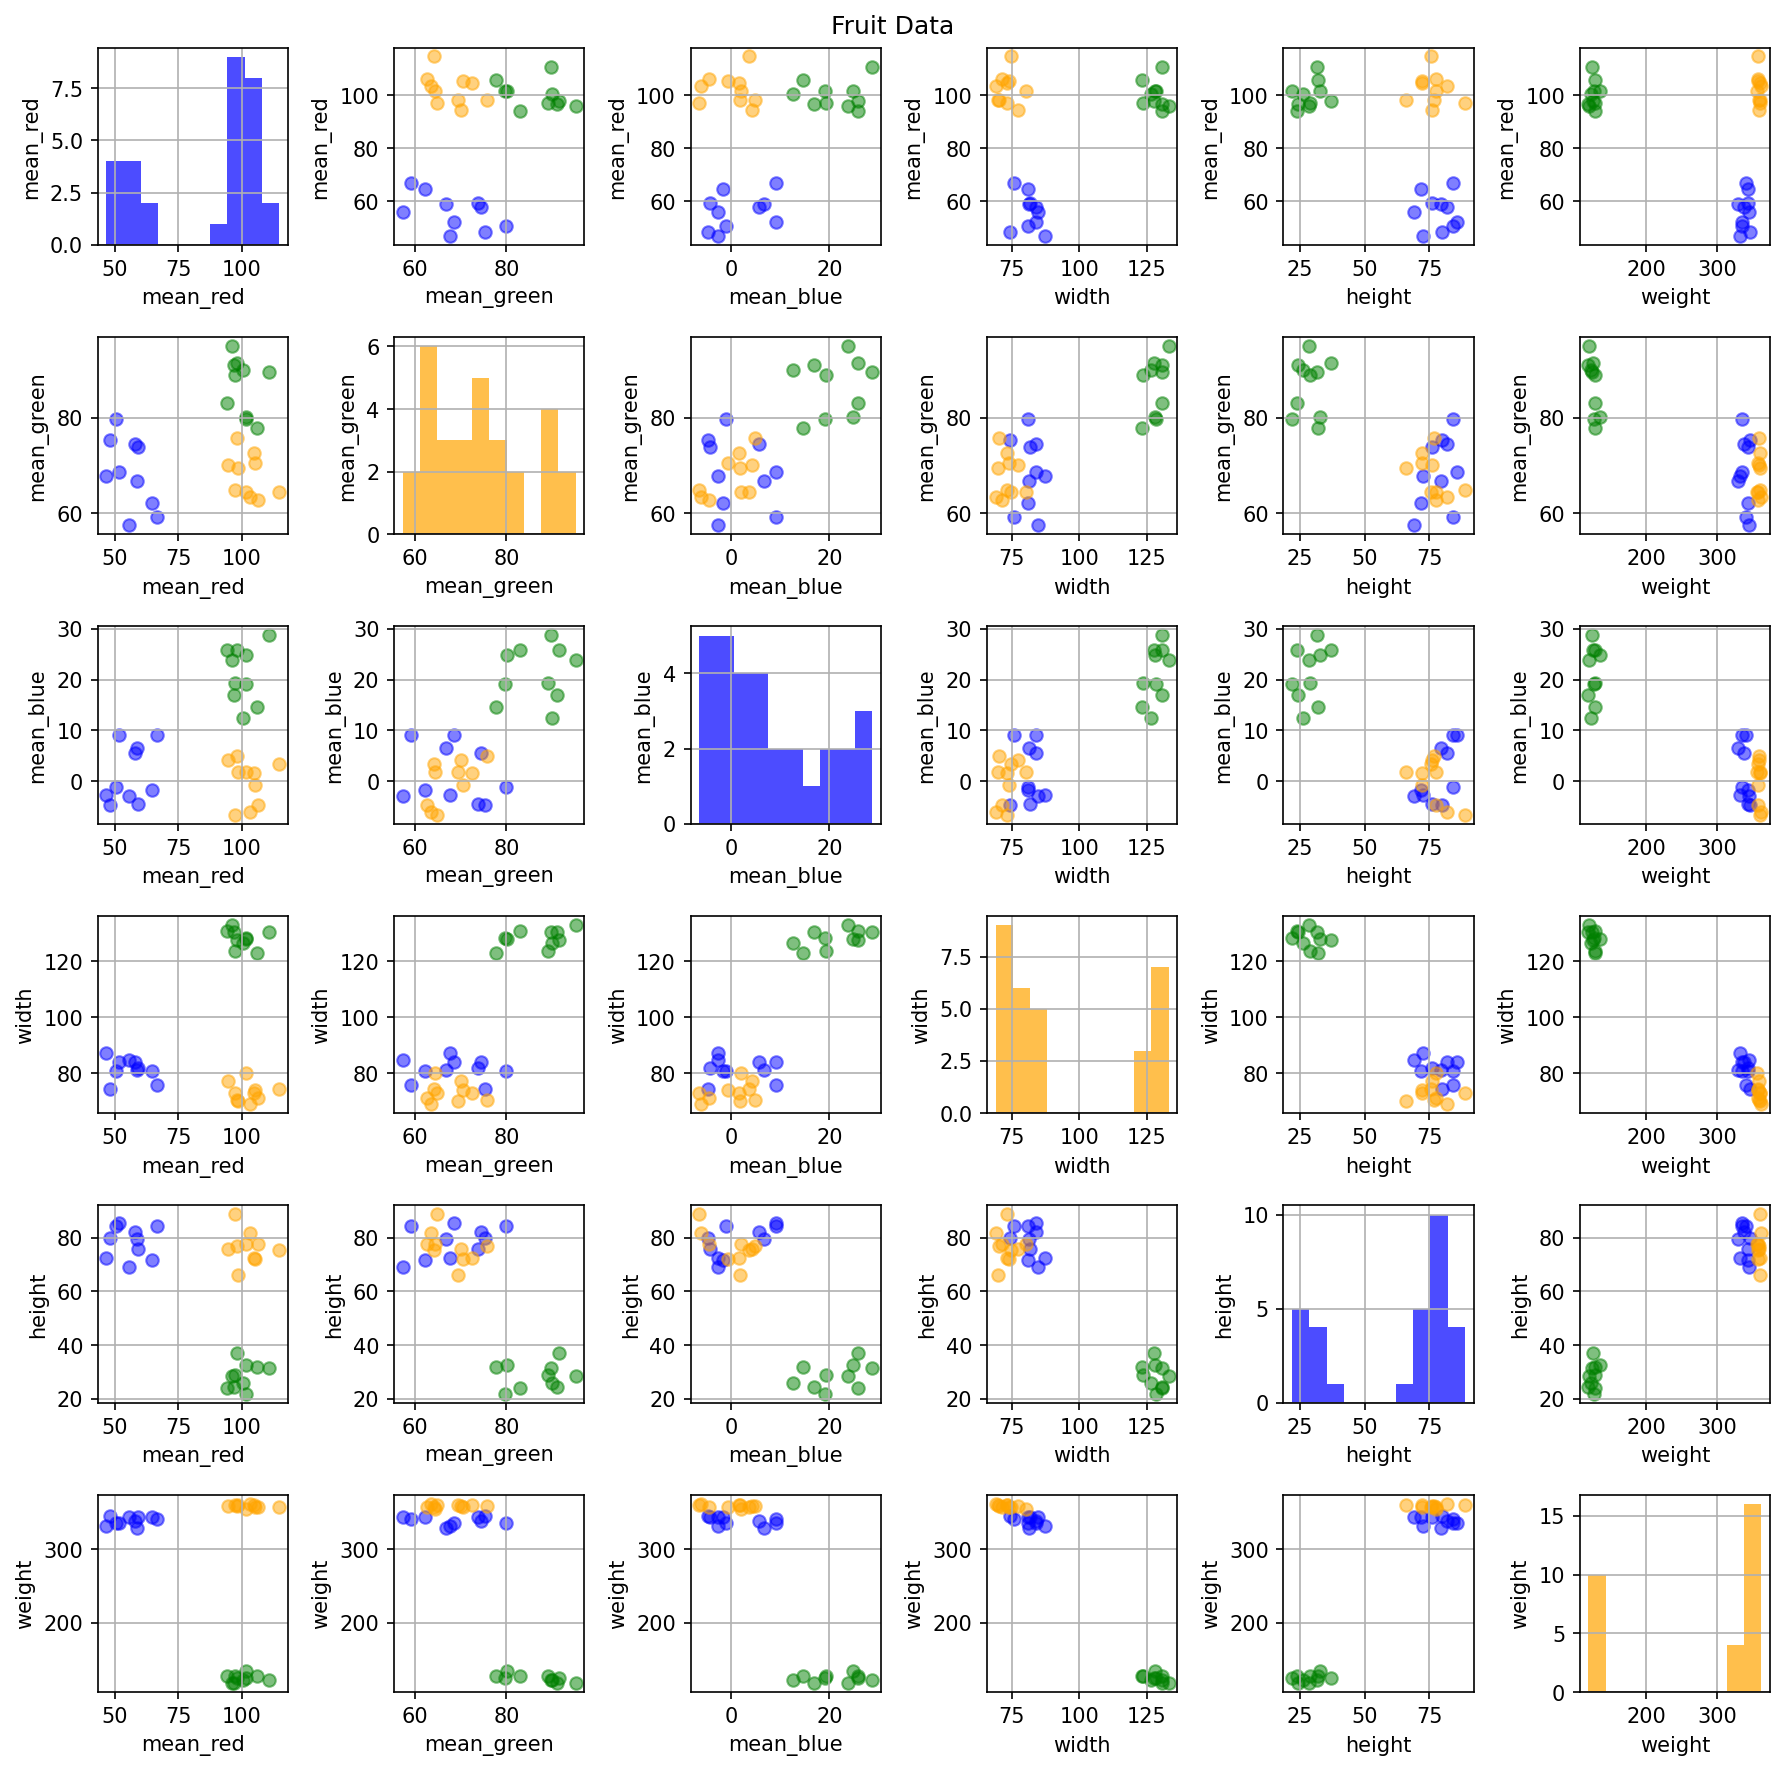

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def cluster_and_visualise(datafilename, num_clusters, featurenames):
    data = np.genfromtxt(datafilename, delimiter=',')
    transposed_data = data.T

    fig, axs = plt.subplots(len(transposed_data), len(transposed_data))
    fig.set_size_inches(25, 25)

    kmeans = KMeans(n_clusters=num_clusters)
    clusters = kmeans.fit_predict(transposed_data.T)

    cluster_colors = ['blue', 'green', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'yellow', 'red', 'brown']
    histogram_colors = ['blue', 'orange']

    for i, row_axs in enumerate(axs):
        for j, ax in enumerate(row_axs):
            if i == j:
                ax.hist(transposed_data[i], color=histogram_colors[i % 2], alpha=0.7)
                ax.set_xlabel(featurenames[i])
                ax.set_ylabel(featurenames[i])
            else:
                for cluster_label in range(num_clusters):
                    cluster_data = data[clusters == cluster_label].T
                    ax.scatter(cluster_data[j], cluster_data[i], c=cluster_colors[cluster_label], marker='o', alpha=0.5)
                ax.set_xlabel(featurenames[j])
                ax.set_ylabel(featurenames[i])

            ax.grid()

    fig.suptitle("Fruit Data")
    fig.set_size_inches(12, 12)
    fig.set_dpi(150)
    fig.tight_layout()
    plt.savefig("myVisualisation.png")
    plt.show()

if __name__ == "__main__":
    featurenames = ('mean_red', 'mean_green', 'mean_blue', 'width', 'height', 'weight')
    datafile = 'fruit_values.csv'
    cluster_and_visualise(datafile, 3, featurenames)
